*Generated by **Chatgpt**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# 1. 定義 Runge function
def runge_function(x):
    return 1 / (1 + 25 * x**2)

In [16]:
# 2. 產生隨機點
from sklearn.model_selection import train_test_split
np.random.seed(42)
x_all = np.random.uniform(-1, 1, 500).reshape(-1, 1)   # 在 [-1,1] 隨機取 500 個點
y_all = runge_function(x_all)

# 3. 切分 train/test (8:2)
x_train, x_val, y_train, y_val = train_test_split(
    x_all, y_all, test_size=0.2, random_state=42
)

In [17]:
# 3. 建立神經網路模型
model = keras.Sequential([
    layers.Dense(64, activation="tanh", input_shape=(1,)),
    layers.Dense(64, activation="tanh"),
    layers.Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(optimizer="adam", loss="mse")

In [19]:
# 4. 訓練模型
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=500,
    verbose=0
)

In [20]:
# 5. 預測
y_pred = model.predict(x_val)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [21]:
# 6. 評估誤差
mse = np.mean((y_val - y_pred)**2)
max_error = np.max(np.abs(y_val - y_pred))
print(f"MSE: {mse:.6f}")
print(f"Max error: {max_error:.6f}")

MSE: 0.000003
Max error: 0.003168


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


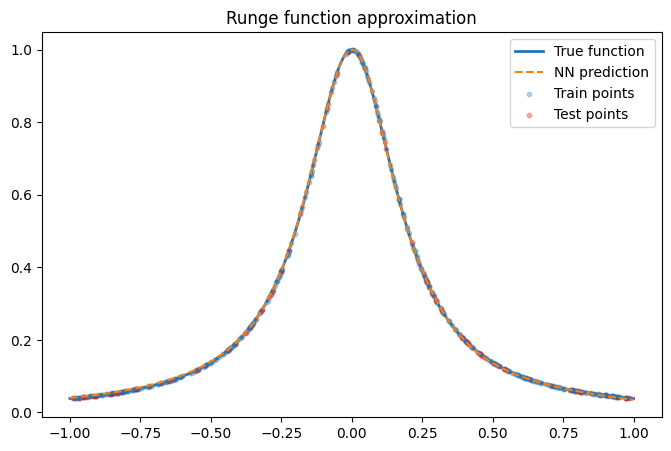

In [24]:
# 7. 畫圖 (真實函數 vs NN)
x_grid = np.linspace(-1, 1, 500).reshape(-1, 1)
y_true = runge_function(x_grid)
y_grid_pred = model.predict(x_grid)

plt.figure(figsize=(8,5))
plt.plot(x_grid, y_true, label="True function", linewidth=2)
plt.plot(x_grid, y_grid_pred, label="NN prediction", linestyle="--")
plt.scatter(x_train, y_train, s=10, alpha=0.3, label="Train points")
plt.scatter(x_val, y_val, s=10, alpha=0.3, label="Test points", color="red")
plt.legend()
plt.title("Runge function approximation")
plt.show()

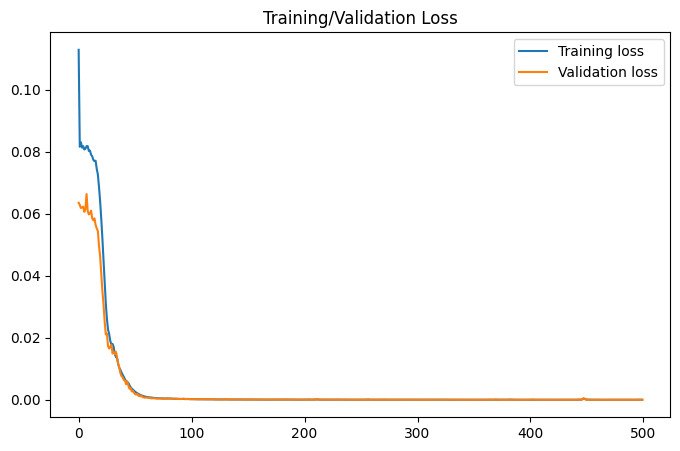

In [26]:
# 8. 畫 loss 曲線
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.legend()
plt.title("Training/Validation Loss")
plt.show()